In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [4]:
train = pd.read_csv('C:/Users/divya/Store_Sales/train.csv')
store = pd.read_csv('C:/Users/divya/Store_Sales/store.csv')

C:\Users\divya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
train.shape, store.shape

((1017209, 9), (1115, 10))

In [6]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
df = pd.merge(train, store, on = 'Store', how = 'left')

In [13]:
df.shape

(1017209, 18)

In [14]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [17]:
copy_df = df.copy()

In [18]:
copy_df['StateHoliday'] = copy_df['StateHoliday'].replace({'a': 1, 'b': 2, 'c': 3, '0': 0})
copy_df['StoreType'] = copy_df['StoreType'].replace({'a': 1, 'b': 2, 'c': 3, 'd': 4})
copy_df['Assortment'] = copy_df['Assortment'].replace({'a': 1, 'b': 2, 'c': 3})

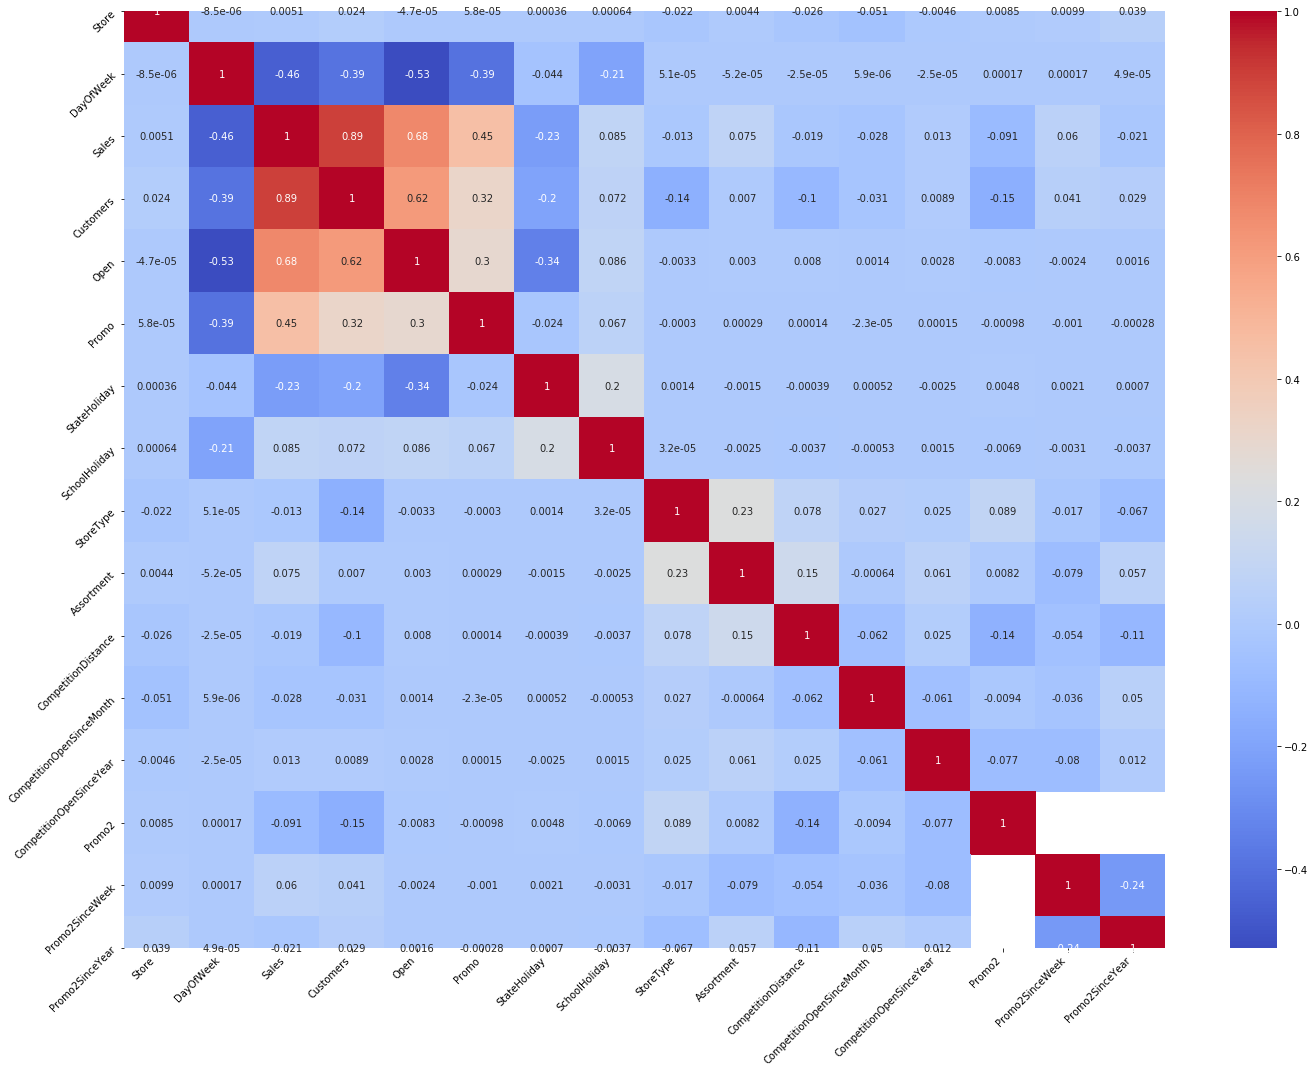

In [19]:
corr = copy_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=45)               # Rotate y-axis labels if needed
plt.tight_layout()                   # Adjust layout to prevent clipping
plt.show()

Sales is correlated to the Number of Customers, DayofWeek, Open and Promo

In [20]:
del copy_df
gc.collect()

17642

# Sales Trend over Days of Week

In [21]:
dow = df[['DayOfWeek','Sales']].groupby(['DayOfWeek']).agg({'Sales':'mean'}).reset_index()
dow

,DayOfWeek,Sales
0,1,7809.044510
1,2,7005.244467
2,3,6555.884138
3,4,6247.575913
4,5,6723.274305
5,6,5847.562599
6,7,204.183189


Text(0, 0.5, 'Sales')

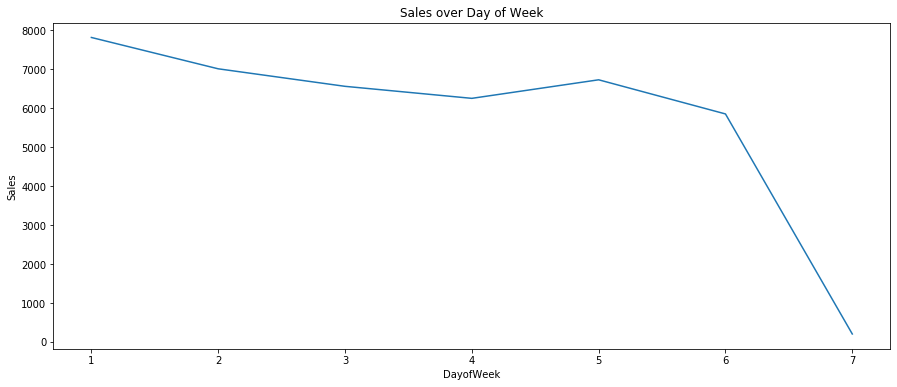

In [22]:
plt.figure(figsize=(15,6))
sns.lineplot(data = dow, x='DayOfWeek', y = 'Sales')
plt.title('Sales over Day of Week')
plt.xlabel('DayofWeek')
plt.ylabel('Sales')

Sales go down over the weekend and especially on the last day of the week takes a dive

# Sales over Days of Week and Promotions

Text(0.5, 1.0, 'Sales over Day of Week by Promo')

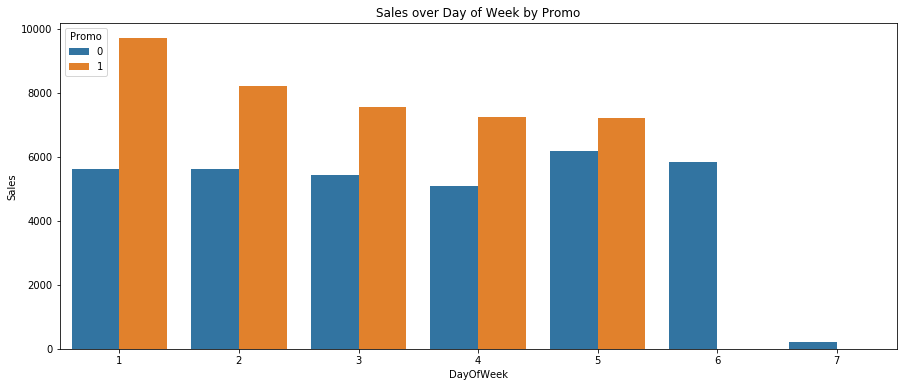

In [23]:
dow = df[['DayOfWeek','Promo','Sales']].groupby(['DayOfWeek','Promo']).agg({'Sales':'mean'}).reset_index()
plt.figure(figsize=(15,6))
sns.barplot(data=dow, x='DayOfWeek', y='Sales', hue='Promo')
plt.title('Sales over Day of Week by Promo')


Sales are higher when the stores have promotions on. There are no promotions on Saturday and Sunday

In [24]:
#Apply transformations to the date column
def date_transform(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Day'] = df['Date'].dt.day
    df['DayofWeekNum'] = df['Date'].dt.weekday
   # df['DayofWeek'] = df['Date'].dt.strftime('%A')
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    
    df['WeekNum'] = df['Date'].dt.isocalendar().week
    df['RollingWeekNum'] = df['WeekNum'] % 52
    df['RollingWeekNum'] = df['RollingWeekNum'].replace(0, 52)  # Handle 52nd week case
    
    return df


df = date_transform(df)

In [25]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,DayofWeekNum,Month,Year,WeekNum,RollingWeekNum
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,0,NaN,NaN,NaN,31,4,7,2015,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,4,7,2015,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,4,7,2015,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,0,NaN,NaN,NaN,31,4,7,2015,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,0,NaN,NaN,NaN,31,4,7,2015,31,31


In [ ]:
Sales Trend over Month

In [19]:
monthly_sales=df[['Year','Month','Sales','Customers']].groupby(['Year','Month']).agg({'Sales':'sum','Customers':'sum'}).reset_index()
pivot_sales = monthly_sales.pivot(index='Month',columns='Year',values = 'Sales')
pivot_sales

Year,2013,2014,2015
Month,,,
1,180132207.0,187752787.0,198843730.0
2,171534275.0,178924677.0,178275458.0
3,201180369.0,193019854.0,205631683.0
4,183431432.0,194544977.0,197918886.0
5,185411063.0,194693257.0,189143897.0
6,180702351.0,190047051.0,207363373.0
7,208843882.0,173892707.0,212322616.0
8,198042727.0,163748475.0,NaN
9,178053963.0,164516168.0,NaN


C:\Users\divya\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\divya\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\divya\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


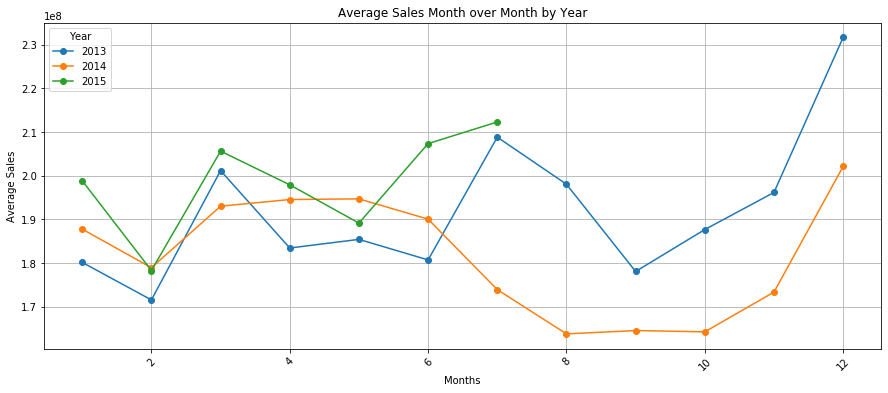

In [20]:
Typeplt.figure(figsize=(15,6))
for year in pivot_sales.columns:
    plt.plot(pivot_sales.index, pivot_sales[year], marker = 'o', label = f'{year}')
plt.xlabel('Months')
plt.ylabel('Average Sales')
plt.title('Average Sales Month over Month by Year')
plt.xticks(rotation = 45)
plt.grid(visible = True)
plt.legend(title = 'Year')

Sales show a peak during the holiday peak from October to December

In [21]:
del dow, monthly_sales, pivot_sales
gc.collect()

0

In [2]:
df.head()

NameError: name 'df' is not defined